# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number: 2103793

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

the Monte Carlo estimate for the integral is 0.35920896235396343


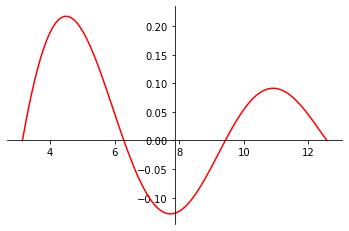

In [2]:
# define the function to integrate
def my_fun(x):
    return -np.sin(x) / x

# set the interval [a,b] and the number of samples
a = np.pi
b = 4 * np.pi
N = 1000000

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean
print("the Monte Carlo estimate for the integral is", my_integral)

# linearly spaced numbers
x = np.linspace(np.pi,4 * np.pi,100)

# the function, here
y = -np.sin(x) / x

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

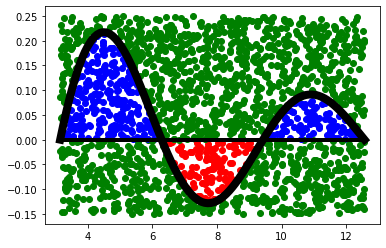

area is approximately =  0.2405


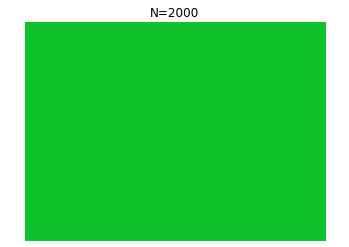

RGB values for average colour =  (0.062, 0.7595, 0.1785)


In [3]:
N = 2000
x = np.random.uniform(np.pi, 4 * np.pi, N)
y = np.random.uniform(-0.15,0.25, N)


#totalabove counts the number of dots contained within the graph but above the x axis.
#totalbelow counts the number of dots contained within the graph but below the x axis.
# y = -sin(x) / x can be rewritten as yx + sin(x) = 0
# so if a point has y coordinate less than 0, and yx + sin(x) > 0, we can conclude that the point belongs in totalbelow
# so if a point has y coordinate greater than 0, and yx + sin(x) < 0, we can conclude that the point belongs in totalabove.
# if these conditions arent satisfied, then we consider it be be "outside" the graph.
# so totalbelow + totalabove + below = 2000

totalbelow = 0
totalabove = 0
outside = 0
r = y*x + np.sin(x)
s = y
for i in range(N):
    if r[i] > 0 and s[i] < 0:
        totalbelow+=1
        plt.plot(x[i], y[i], 'or')
    elif r[i] < 0 and s[i] > 0:
        totalabove+=1
        plt.plot(x[i], y[i], 'ob')
    else:
        outside+=1
        plt.plot(x[i], y[i], 'og')

# 100 linearly spaced numbers
x = np.linspace(np.pi,4 * np.pi,100)

# plot the function here
y = -np.sin(x) / x
s = 0 * x
plt.plot(x,y, 'black', lw="8")
plt.plot(x,s, 'black', lw="4")
plt.show()

# the area is the proportion of points in the graph / total points (ie 2000)
print("area is approximately = ", ((totalabove)+totalbelow)/(N))

# to find average colour, we sum up the colour of the 2000 points. since red is (1,0,0) in RGB code
# and green and blue are (0,1,0) and (0,0,1) respecively, the average colour is:
# (proportion of red dots)*(1,0,0) + proportion of green dots * (0,1,0) + proportion of blue dots * (0,0,1)

R, G, B = (totalbelow/2000),((2000-(totalabove+totalbelow))/2000),(totalabove/2000)

# plot a square with the mean colour
plt.plot(0.1, 0.1, 's', markersize=300, color = (R,G,B))
plt.axis('off')
plt.title("N="+str(N))    
plt.show()
print("RGB values for average colour = ", (R,G,B))